## **Crack Detection on Concrete.**

By Vinayak Sivaprasad

# *Setup Environment and Libraries*
Import necessary libraries including TensorFlow, Keras, OpenCV, NumPy, and Matplotlib.

# *Load Pre-trained Models*
Load the pre-trained ResNet50 and VGG16 models using Keras. I have setup NVIDIA Toolkit 11.8 with Tensorflow GPU for my model training.

# *Define Image Data Generators*
Set up image data generators for the validation and test sets using Keras' ImageDataGenerator. These generators will preprocess the input images and can be used to feed data to the models during evaluation.

# *Evaluate Model Performance*
Evaluate the performance of the models using the evaluate_generator method. This calculates the loss and accuracy of the models on the validation set.

# *Predict on Test Data*
Use the predict_generator method to predict the classes of the first five images in the test set using both the ResNet50 and VGG16 models. Print the predicted classes.

# *Real-time Crack Detection*
Implement real-time crack detection using the ResNet model. Continuously loop through images in a specified folder, preprocess each image, make predictions using the ResNet model, and display the results (original image and predicted label).


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Utilize GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')

VALID_DIR = '/home/vinayak/Crack Detection/concrete_data/valid'
BATCH_SIZE = 100
TARGET_SIZE = (224, 224)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2) # use 20% of the data for validation
valid_generator = valid_datagen.flow_from_directory(VALID_DIR, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, subset='training')
validation_generator = valid_datagen.flow_from_directory(VALID_DIR, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, subset='validation')

base_model = VGG16(include_top=False, pooling='avg', weights='imagenet') # Include weights='imagenet' to utilize pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(valid_generator, steps_per_epoch=valid_generator.n//valid_generator.batch_size, validation_data=validation_generator, validation_steps=validation_generator.n//validation_generator.batch_size, epochs=1)


model.save('Vinayak\'s_model.h5')
model.summary()

GPU is being used.
Found 5798 images belonging to 2 classes.
Found 1449 images belonging to 2 classes.


2024-02-21 11:05:59.106603: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-21 11:05:59.106765: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-21 11:05:59.106802: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-21 11:05:59.359758: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-21 11:05:59.359849: I external/local_xla/xla/stream_executor

58889256/58889256 [==============================] - 10s 0us/step


2024-02-21 11:06:11.919200: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-21 11:06:12.349419: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-21 11:06:12.839421: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-21 11:06:12.839492: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-21 11:06:13.085303: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran o

 1/57 [..............................] - ETA: 18:12 - loss: 2.5198 - accuracy: 0.2900

2024-02-21 11:06:30.236585: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
I0000 00:00:1708493790.313928   20616 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


57/57 [==============================] - 56s 656ms/step - loss: 0.3743 - accuracy: 0.8605 - val_loss: 0.1442 - val_accuracy: 0.9529
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14715714 (56.14 MB)
Trainable params: 1026 (4.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


/home/vinayak/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
# Part 2
from tensorflow.keras.models import load_model

# Load the saved ResNet50 model
resnet_model = load_model('Vinayak\'s_model.h5')

# Construct ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Set shuffle argument to False
test_generator = test_datagen.flow_from_directory(VALID_DIR, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, shuffle=False)

# Evaluate the ResNet50 model
resnet_score = resnet_model.evaluate_generator(test_generator)
print("ResNet50 model performance: ", resnet_score)

# Evaluate the VGG16 model
vgg_score = model.evaluate_generator(test_generator)
print("VGG16 model performance: ", vgg_score)


Found 7247 images belonging to 2 classes.


/tmp/ipykernel_1147/63372125.py:14: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  resnet_score = resnet_model.evaluate_generator(test_generator)


ResNet50 model performance:  [0.14174389839172363, 0.9580516219139099]


/tmp/ipykernel_1147/63372125.py:18: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  vgg_score = model.evaluate_generator(test_generator)


VGG16 model performance:  [0.14174389839172363, 0.9580516219139099]


In [9]:
# Part 3
import numpy as np  # Import numpy

# Predict class of first five images using ResNet50 model
resnet_predictions = resnet_model.predict_generator(test_generator, steps=1)
print("ResNet50 model predictions: ", ["Positive" if np.argmax(pred) == 1 else "Negative" for pred in resnet_predictions[:5]])

# Predict class of first five images using VGG16 model
vgg_predictions = model.predict_generator(test_generator, steps=1)
print("VGG16 model predictions: ", ["Positive" if np.argmax(pred) == 1 else "Negative" for pred in vgg_predictions[:5]])


/tmp/ipykernel_1147/359405642.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  resnet_predictions = resnet_model.predict_generator(test_generator, steps=1)


ResNet50 model predictions:  ['Negative', 'Negative', 'Negative', 'Negative', 'Negative']


/tmp/ipykernel_1147/359405642.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  vgg_predictions = model.predict_generator(test_generator, steps=1)


VGG16 model predictions:  ['Negative', 'Negative', 'Negative', 'Negative', 'Negative']


1/1 [==============================] - 0s 105ms/step


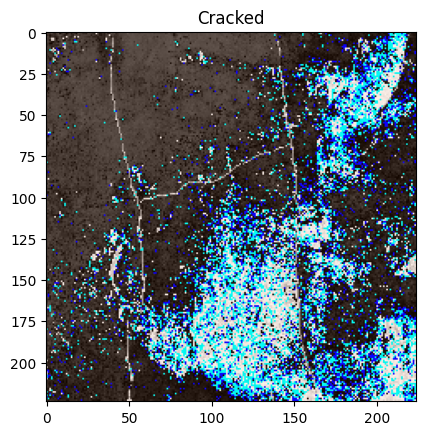

1/1 [==============================] - 0s 18ms/step


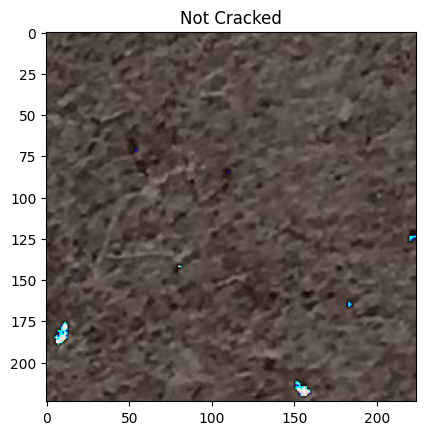

1/1 [==============================] - 0s 19ms/step


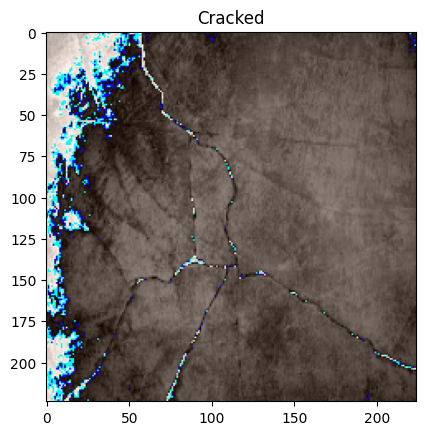

1/1 [==============================] - 0s 19ms/step


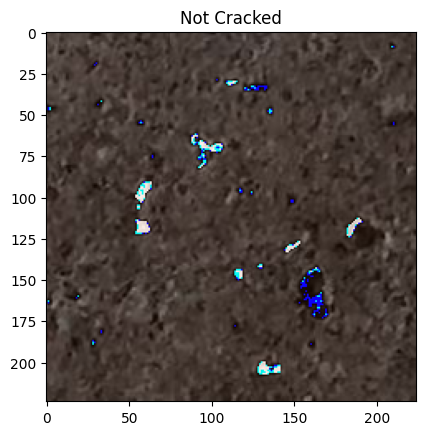

1/1 [==============================] - 0s 21ms/step


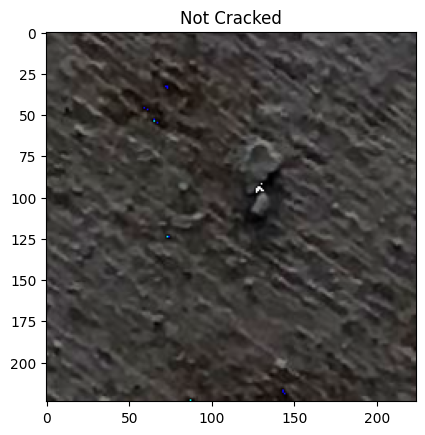

1/1 [==============================] - 0s 21ms/step


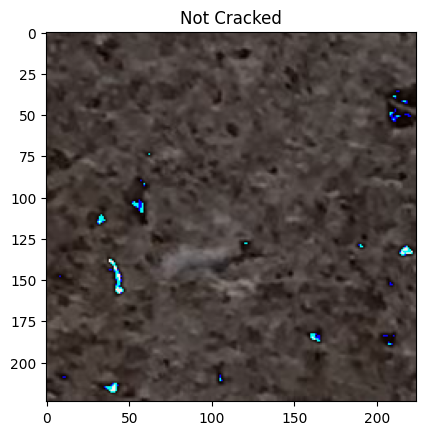

In [17]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Load the saved ResNet model
resnet_model = load_model('Vinayak\'s_model.h5')

# Path to the folder containing images
image_folder = 'Random_images'

# Function to process and predict on images
def predict_images(image_folder):
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"): 
            image_path = os.path.join(image_folder, filename)
            # Read and preprocess the image
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))
            img = preprocess_input(img)
            img = np.expand_dims(img, axis=0)
            # Predict using the ResNet model
            prediction = resnet_model.predict(img)
            label = "Cracked" if np.argmax(prediction) == 1 else "Not Cracked"
            # Display the image and prediction
            plt.imshow(img[0].astype(np.uint8))  # Ensure the image is in uint8 format
            plt.title(label)
            plt.show()

# Run real-time detection
predict_images(image_folder)


Each step in the notebook focuses on a specific task, such as loading models, evaluating performance, predicting on test data, and real-time crack detection. The notebook combines these steps to demonstrate the process of building, evaluating, and using pre-trained models for crack detection.

## Thank You!